# 디지털신호처리 기말고사 대체 과제물
## 컴퓨터과학과 201810954 안지민

### color 영상의 noise 제거에 관한 과제입니다. 
**(원본 이미지 - filtering 된 이미지의 PSNR이 높으면 좋은 점수를 받습니다.)**


1. airplane_noise.bmp color image를 읽고 noise를 제거하세요. 반드시 수업시간에 사용하고 과제에서 upgrade 한 convolve function 을 사용하여 filtering 하세요. package에서 제공하는 method를 사용하여 filtering하면 0점 처리합니다.


2. 다음의 형식으로 세 개의 영상을 display 하세요. (subplot 명령어 사용)  
: (원본 이미지 , noise 이미지, filtering 된 이미지 순으로 세 개의 이미지가 서로 비교 가능하게 display)


3. 이미지에서 PSNR (peak to signal ratio)이란 무엇인지 조사해서 설명하세요. (코드 작성 필요 없음)


4. skimage.measure.compare_psnr 을 사용하여 원본 이미지- noise image의 PSNR 및 원본 이미지  
: filtering된 image의 PSNR 을 각각 구하세요.


5. pepper_noise.bmp 파일에 대해 위의 1, 2, 4번 문제를 반복하세요.


6. 영상의 noise를 제거하기 위해 filtering 하면서 제일 중요한 점은 무엇이라고 생각했습니까? 그 이유는? (코드 작성은 필요없는 문항임)


7. (선택) 본 강좌를 들으면서 디지털신호처리 분야에 대한 여러분의 관심이 생겼으리라 생각합니다. 제가 운영하는 multimedia security lab에서는 디지털 영상을 보고 촬영한 카메라를 알아내는 연구, 유리에 맺힌 눈자국 또는 빗방울을 제거하는 기술, 동영상에 비밀 데이터를 숨기는 기술 등 다양한 분야의 연구를 인공지능 기술 등을 바탕으로 연구하고 있습니다.  연구 참여에 관심이 있는 학생은 간단히 의사를 표현해주세요.

In [72]:
import numpy as np
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import skimage
from skimage import data,io
from skimage.exposure import rescale_intensity
from skimage import measure
from random import random
from skimage.measure import compare_psnr

## 문제1.
airplane_noise.bmp color image를 읽고 noise를 제거하세요.  
반드시 수업시간에 사용하고 과제에서 upgrade 한 convolve function 을 사용하여 filtering 하세요.  
package에서 제공하는 method를 사용하여 filtering하면 0점 처리합니다.

: 원본 이미지를 아래와 같이 먼저 읽어보자

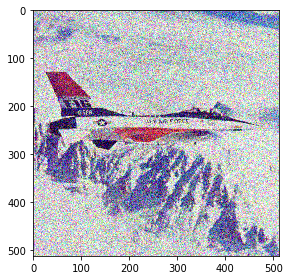

In [73]:
airplane_img = io.imread("airplane_noise.bmp")
io.imshow(airplane_img)
plt.show()

### 원본 이미지에 salt&pepper 즉 노이즈를 추가하여보자

In [74]:
def salt_and_pepper(image, p): 
    output = np.zeros(image.shape,np.uint8) 
    thres = 1 - p 
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            rdn = random() 
            if rdn < p: 
                output[i][j] = 0 
            elif rdn > thres: 
                output[i][j] = 255 
            else: 
                output[i][j] = image[i][j] 
    return output

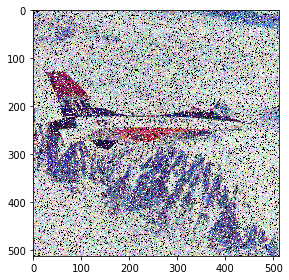

In [75]:
noise_img = salt_and_pepper(airplane_img,0.1)
io.imshow(noise_img)
plt.show()

## noise removal sol. median filter
median_filter를 통해 noise를 제거해보자

In [76]:
def medfilter(in_img,rad): 
    img = np.copy(in_img)
    mid = 2*rad*rad+2*rad+1 
    r = []
    g = []
    b = [] 
    for i in range(in_img.shape[0]):
        for j in range(in_img.shape[1]):
            if i<rad or i>(in_img.shape[0]-(rad+1)) or j<rad or j>(in_img.shape[1]-(rad+1)): 
                pass 
            else:
                r.clear();g.clear();b.clear()
                for x in range(-1*rad,rad+1):
                    for y in range(-1*rad,rad+1): 
                        r.append(in_img[i+x,j+y][0])
                        g.append(in_img[i+x,j+y][1])
                        b.append(in_img[i+x,j+y][2]) 
               
                r.sort()
                g.sort()
                b.sort() 
               
                img[i,j]=(r[mid],g[mid],b[mid]) 
    return img

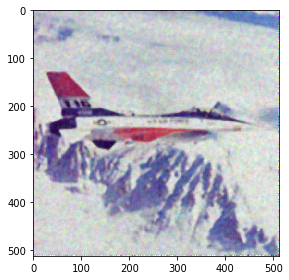

In [77]:
median_img = medfilter(airplane_img,3) 
io.imshow(median_img)
plt.show()

## 문제2.
다음의 형식으로 세 개의 영상을 display 하세요. (subplot 명령어 사용)  
(원본 이미지 , noise 이미지, filtering 된 이미지 순으로세 개의 이미지가 서로 비교 가능하게 display)

: 원본 이미지, 노이즈 이미지, 필터링 이미지(using median filter)순으로 나열

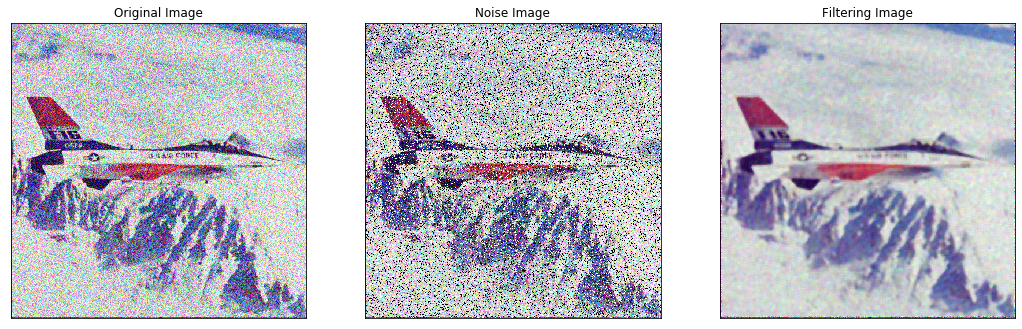

In [78]:
plt.figure(figsize=(18,15))
plt.subplot(1,3,1)
plt.imshow(airplane_img),plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(noise_img),plt.title('Noise Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(median_img),plt.title('Filtering Image')
plt.xticks([]),plt.yticks([])
plt.show()

## 문제3
이미지에서 PSNR (peak to signal ratio)이란 무엇인지 조사해서 설명하세요.(코드 작성 필요 없음)


  
- 영상의 화질을 측정하기 위해 주로 사용하고 있는 parameter이다
- 대부분의 영상 압축 과정에서 데이터 손실이 발생하고, 원본 영상과 어느정도 차이를 보이게 된므로 이러한 차이를 측정하기 위해 제안된 것
- 한 픽셀을 나타내는 8비트의 최대값인 255에 대한 노이즈의 비율을 구할 수 있음
- 노이즈 값으로는 MSE를 사용한다 : MSE란 원본 영상과 데이터의 손실이 있는 영상간의 픽셀 대 픽셀 차이값의 제곱합을 평균낸 값
- psnr의 단위는 db을 사용 : MSE가 0이라면 psnr은 무한대의 값을 갖게 됨
- 일반적으로 30db이상이면 괜찮은 값으로 본다


## 문제4
skimage.measure.compare_psnr 을 사용하여 원본 이미지- noise image의 PSNR 및 원본 이미지 filtering된 image의 PSRN 을 각각 구하세요.

: 원본이미지와 비교하여 노이즈 이미지, 필터링 이미지 각각의 psrn을 구해보자

In [79]:
print('Noisy PSNR: '+ str(compare_psnr(airplane_img, noise_img)))
print('Filtering PSNR :'+ str(compare_psnr(airplane_img,median_img)))


Noisy PSNR: 11.61235446248902
Filtering PSNR :15.794392879006692


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  


## 문제5
pepper_noise.bmp 파일에 대해 위의 1, 2, 4번 문제를 반복하세요.

In [80]:
pepper_noise = io.imread("pepper_noise.bmp")
noise_img = salt_and_pepper(pepper_noise,0.1)
median_img = medfilter(pepper_noise,3) 

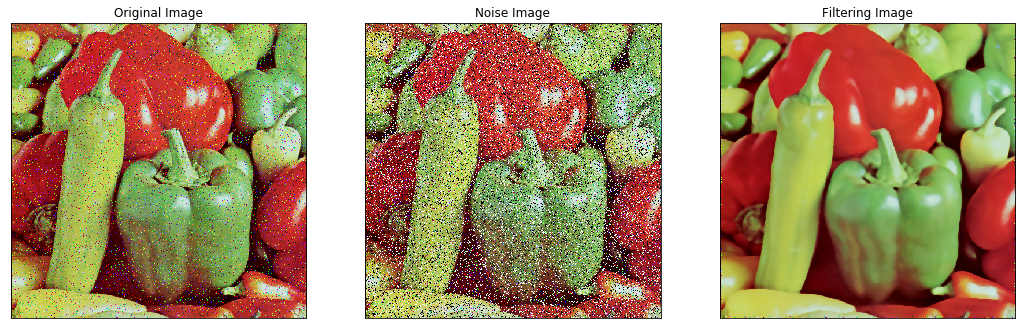

In [81]:
plt.figure(figsize=(18,15))
plt.subplot(1,3,1)
plt.imshow(pepper_noise),plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(noise_img),plt.title('Noise Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(median_img),plt.title('Filtering Image')
plt.xticks([]),plt.yticks([])
plt.show()

In [82]:
print('Noisy PSNR: '+ str(compare_psnr(pepper_noise, noise_img)))
print('Filtering PSNR :'+ str(compare_psnr(pepper_noise,median_img)))

Noisy PSNR: 11.800558261608638
Filtering PSNR :17.819724328226915


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  


## 문제 6
영상의 noise를 제거하기 위해 filtering 하면서 제일 중요한 점은 무엇이라고 생각했습니까? 그 이유는?

: 각 픽셀 정보의 특성을 유지하면서 노이즈를 제거하는 것이 제일 중요하다고 생각합니다  
그 이유는 영상의 노이즈를 제거하는데에만 몰두해 각 픽셀 정보의 고유의 값의 편차가 사라져서 디테일이 저하되는 경우가 있는데  
원본을 많이 손상시키지 않는 선에서 효과적으로 노이즈 필터링을 하는 것이 중요하다고 생각하기 때문입니다.  


